In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cleandf.csv', sep=';').drop(['Unnamed: 0','time'],axis= 'columns')
print('Samples total: {}'.format(len(df)))

#This is a bit messy. Need to think about a proper way to treat NaNs 
# (if discarded, the dataset gets reduced to ca. 5%)
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
print('Samples used:  {}'.format(len(df)))

X_train, X_test, y_train, y_test = train_test_split(df.drop(axis=1,labels = ['dist']), df['dist']*10, test_size=0.3)
print('Samples train: {}'.format(len(y_train)))
print('Samples test:  {}'.format(len(y_test)))
      
      
def showplot(x,y):
    plt.scatter(x,y,marker='x')
    plt.xlabel('Real distance [m]')
    plt.ylabel('Predicted distance [m]')
    plt.show()

Samples total: 48157
Samples used:  48157
Samples train: 33709
Samples test:  14448


0.9950858250276855


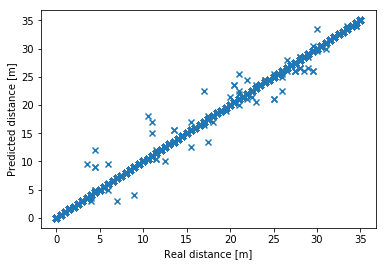

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
x = y_test/10
y = neigh.predict(X_test)/10

print(neigh.score(X_test,y_test))
showplot(x,y)


0.9532115171650055


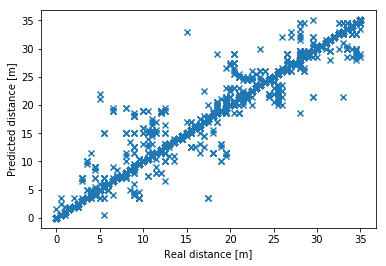

In [83]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40,30),activation='relu',max_iter=1000)
clf.fit(X_train, y_train)
x = y_test/10
y = clf.predict(X_test)/10
print(clf.score(X_test, y_test))
showplot(x,y)

0.9803457047650406


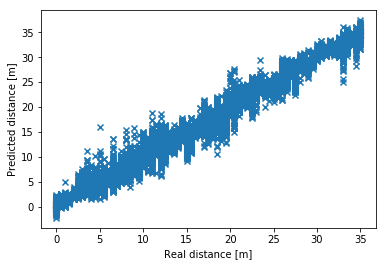

In [84]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 30),activation='relu',max_iter=1000)

clf.fit(X_train, y_train)
x = y_test/10
y = clf.predict(X_test)/10
print(clf.score(X_test, y_test))
showplot(x,y)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
from sklearn.ensemble import RandomForestClassifier